In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Geometry

In [4]:
import matplotlib.patches as patches

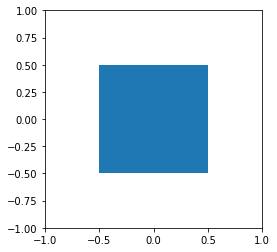

In [5]:
rect = patches.Rectangle((-0.5,-0.5), # Bottom left corner, 
                         1,           # width
                         1)           # height, all in data coordinates

fig, ax = plt.subplots(1,1)
ax.add_patch(rect)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect(1)

There are a lot of kwargs you can pass to the patch:
- hatch: some patter. e.g: '/', '\\', 'o', 'O', '+', '.', '*'
- fill: determine if to draw the fillcolor of the patch or not. True or False
- alpha: visibilty of the patch
- facecolor: color of the patch interior
- edgecolor: color of the border
- linewidth: thickness of the border
- and a lot more. See https://matplotlib.org/api/patches_api.html

#### Data

In [6]:
size = 10
Z = np.random.uniform(-1, 1, size=[size, size])

#### Plot

In [55]:
def plot_matrix(ax, values, norm=None):
    x_max, y_max = values.shape
    
    if norm is None:
        plot_values = values / np.abs(values).max()
    else:
        plot_values = values / norm
    
    for x in range(x_max):
        for y in range(y_max):
            z = plot_values[x,y]
            size = np.abs(z)
            color = 'w' if np.sign(z) > 0 else 'k'
            rect = patches.Rectangle((x-size/2., y-size/2.), size, size, fc=color)
            ax.add_patch(rect)
    ax.set_xlim(-1, x_max)
    ax.set_ylim(-1, y_max)
    ax.set_aspect(1)
    ax.set_facecolor('gray')

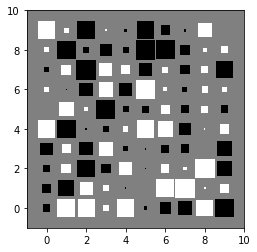

In [56]:
fig, ax = plt.subplots()
plot_matrix(ax, Z)

## Example: Visualizing Matrix Mutiplication

In [57]:
import matplotlib.gridspec as gridspec

#### Data

In [58]:
A = np.random.uniform(0,1, size=[10,5])
B = np.random.uniform(-1,1, size=[5,10])
C = np.dot(A, B)

gl_max = np.max([np.abs(A).max(), np.abs(B).max(), np.abs(C).max()])

#### Plot

In [59]:
def helper(fig, values, i, j, title, norm=None, sharex=None, sharey=None):
    ax = fig.add_subplot(gs[i, j], sharex=sharex, sharey=sharey)
    ax.set_aspect(1)
    ax.set_title(title)
    plot_matrix(ax, values, norm=None)
    ax.set_xticks([])
    ax.set_yticks([])
    
    return ax

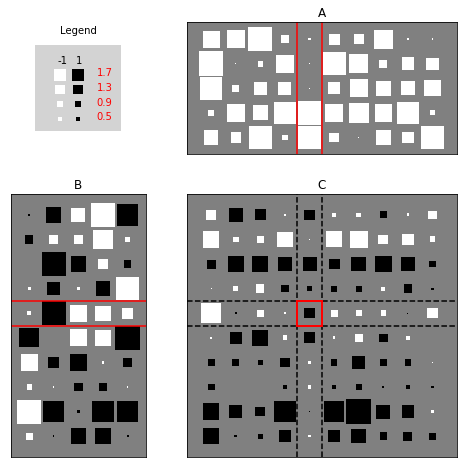

In [137]:
gs = gridspec.GridSpec(2,2, width_ratios=[0.5, 1], height_ratios=[0.5, 1])
fig = plt.figure(figsize=(8,8))

axA = helper(fig, A, 0, 1, 'A', norm=gl_max)
axB = helper(fig, B, 1, 0, 'B', norm=gl_max)
axC = helper(fig, C, 1, 1, 'C', norm=gl_max, sharex=axA, sharey=axB)

ax_leg = fig.add_subplot(gs[0,0], sharex=axC, sharey=axC)
ax_leg.axis('off')

shift_x = 1
shift_y = 1
w = 7
ax_leg.add_patch(patches.Rectangle((shift_x, shift_y), w, w, fc='lightgray'))
ax_leg.text(w/2.+shift_x, w+1+shift_y, "Legend", horizontalalignment='center')
for i in range(2):
    i_s = i * 1.5
    i_s += shift_x + 2
    for j, size in enumerate(np.linspace(0.5, gl_max, num=4)):
        j_s = j * 1.2
        j_s += shift_y + 1
        
        color = 'w' if i == 0 else 'k'
        size_plt = round(size/gl_max, 1) 
        
        ax_leg.add_patch(patches.Rectangle((i_s-size_plt/2., j_s-size_plt/2.), size_plt, size_plt, fc=color))
        
        if i == 0:
            ax_leg.text(shift_x + 5, j_s+0.2, '{}'.format(round(size,1)), verticalalignment='center', color='r')
        if j == 0:
            sign = -1 if i == 0 else 1
            ax_leg.text(i_s-0.2, shift_y + 5.5, '{}'.format(sign))
            
i, j = 4, 5
axA.axvline(i-0.5, color='r')
axA.axvline(i+0.5, color='r')
axB.axhline(j-0.5, color='r')
axB.axhline(j+0.5, color='r')

axC.axvline(i-0.5, color='k', ls='--')
axC.axvline(i+0.5, color='k', ls='--')
axC.axhline(j-0.5, color='k', ls='--')
axC.axhline(j+0.5, color='k', ls='--')

axC.add_patch(patches.Rectangle((i-0.5, j-0.5), 1, 1, ec='r', fill=False, zorder=100, lw=2))